# Regression Analysis
---
**Research question**: "Are people who go out with friends during events, and experience a drain of motivation after socializing, extroverted?"

Specifically, are people who typically go outside, attend social events, have average friend circle sizes, and experience social drain more introverted or extroverted?

$Drained\ after\ socializing$

$Friends\ circle\ size$

$Social\ event\ attendance$

$Going\ outside$

$y = Personality\ (Extroverted\ or\ Introverted)$

$\beta_0 = Intercept$

$\beta_1 = Drained\ after\ socializing$

$\beta_2 = Friends\ circle\ size$

$\beta_3 = Social\ event\ attendance$

$\beta_4 = Going\ outside$

$$y = \beta_0 + \beta_1x + \beta_2z + \beta_3*\beta_4$$

In [21]:
# Receive dataframe from Preprocessing
%store -r pre_df

In [25]:
from pandas import DataFrame

# Manually build dataframe and run regression
model_1_df = DataFrame(
    columns=["x", "z", "x*z"],
    data=[pre_df["Social_event_attendance"], pre_df["Going_outside"]]
)
model_1_df

,x,z,x*z
Social_event_attendance,NaN,NaN,NaN
Going_outside,NaN,NaN,NaN


In [ ]:
from statsmodels.formula.api import ols
import numpy as np

np.random.seed(9876789)

ra_df = pre_df

model = ols(
    formula='Personality_Extrovert ~ Drained_after_socializing + Friends_circle_size + Social_event_attendance*Going_outside',
    data=ra_df
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Personality_Extrovert   R-squared:                       0.719
Model:                               OLS   Adj. R-squared:                  0.719
Method:                    Least Squares   F-statistic:                     1482.
Date:                   Thu, 03 Jul 2025   Prob (F-statistic):               0.00
Time:                           09:46:19   Log-Likelihood:                -261.97
No. Observations:                   2900   AIC:                             535.9
Df Residuals:                       2894   BIC:                             571.8
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 0.7101      0.036     19.984      0.000       0.640       0.780
Drained_after_socializing                -0.7122      0.026    -27.429      0.000      -0.763      -0.661
Friends_circle_size                       0.0007      0.002      0.349      0.727      -0.003       0.005
Social_event_attendance                   0.0311      0.005      5.787      0.000       0.021       0.042
Going_outside                             0.0395      0.007      5.791      0.000       0.026       0.053
Social_event_attendance:Going_outside    -0.0058      0.001     -4.844      0.000      -0.008      -0.003
==============================================================================
Omnibus:                      464.906   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7666.532
Skew:                           0.176   Prob(JB):                         0.00
Kurtosis:                      10.958   Cond. No.                         226.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Plot regression model

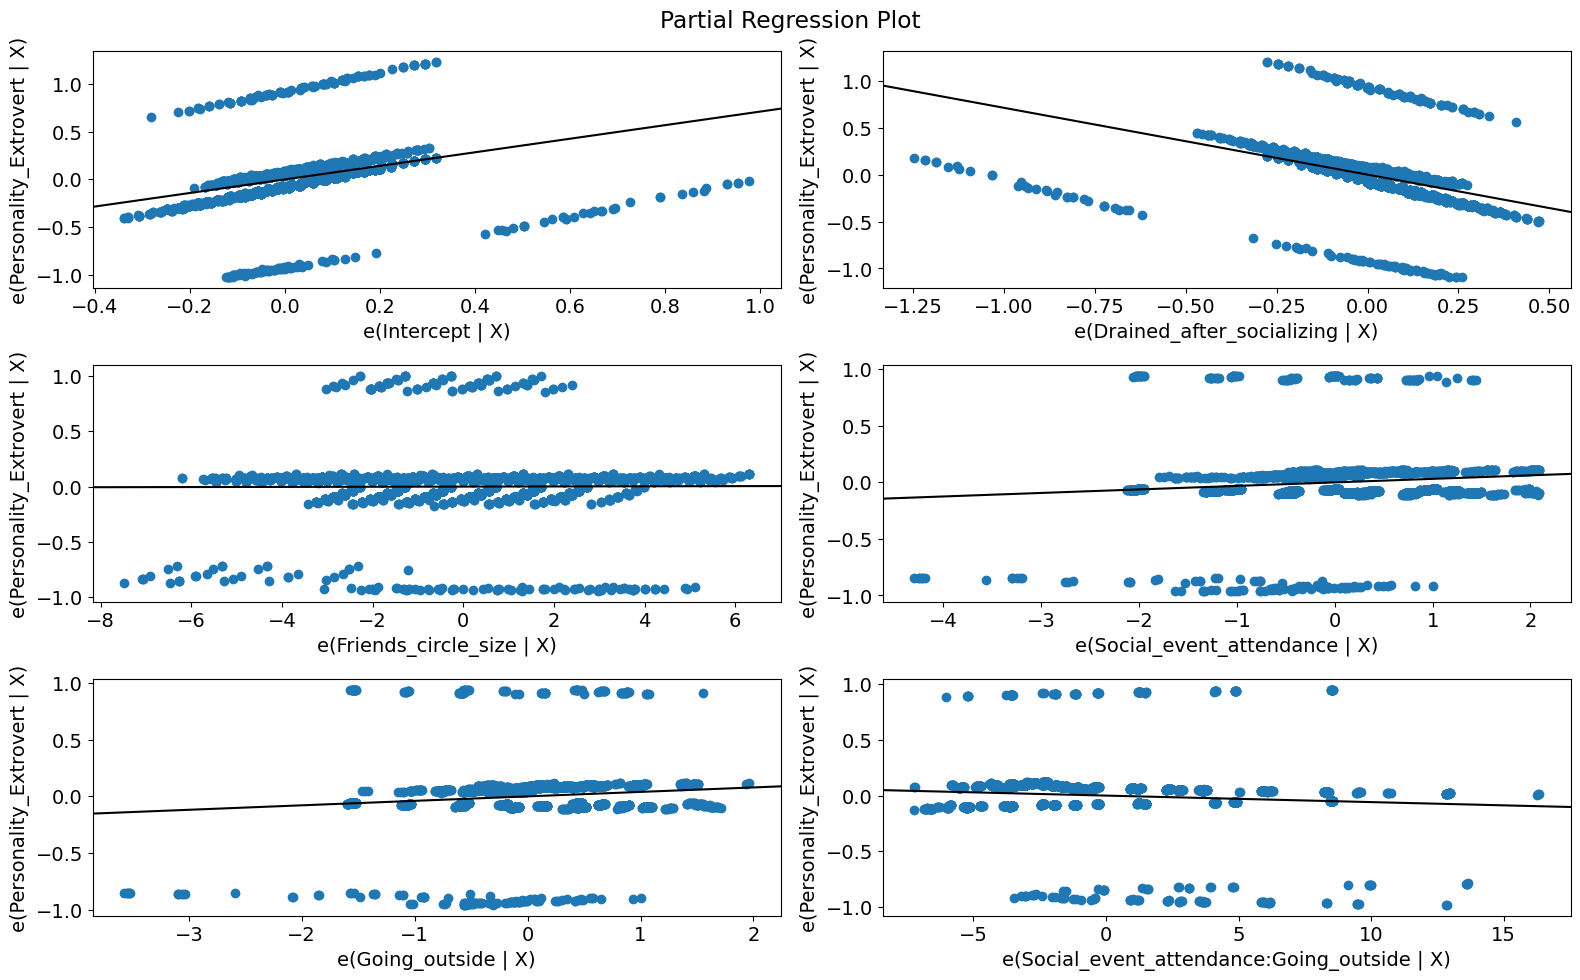

In [4]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

plt.rc("figure", figsize=(16, 10))
plt.rc("font", size=14)

fig = sm.graphics.plot_partregress_grid(model)
fig.tight_layout(pad=1.0)

In [ ]:
print(model.params)
model.params["Drained_after_socializing"]

Intercept                                0.710102
Drained_after_socializing               -0.712194
Friends_circle_size                      0.000695
Social_event_attendance                  0.031136
Going_outside                            0.039513
Social_event_attendance:Going_outside   -0.005841
dtype: float64


np.float64(-0.7121937235604999)

In [18]:
import seaborn as sns

sns.regplot(x='Intercept', y='Personality_Extrovert', data=model)


TypeError: 'RegressionResultsWrapper' object is not subscriptable